In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=15d3d0bc1da64b21549ba87f1ef01204ffac61b50859cc4332fec0156d3ba469
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder \
    .appName("ETL_Demand_Forecasting") \
    .getOrCreate()

In [ ]:
csvdf = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/drive/MyDrive/quantity/predictions_rf.csv")

In [ ]:
from pyspark.sql.functions import col, when

csvdf = csvdf.withColumn("Month",
                         when(col("Month") == 1, "January")
                         .when(col("Month") == 2, "February")
                         .when(col("Month") == 3, "March")
                         .when(col("Month") == 4, "April")
                         .when(col("Month") == 5, "May")
                         .when(col("Month") == 6, "June")
                         .when(col("Month") == 7, "July")
                         .when(col("Month") == 8, "August")
                         .when(col("Month") == 9, "September")
                         .when(col("Month") == 10, "October")
                         .when(col("Month") == 11, "November")
                         .when(col("Month") == 12, "December")
                         .otherwise(col("Month")))

csvdf.show()

+--------------------+-------+---------------+------------------+
|        Product_Name|  Month|   Order_Region|Predicted_Quantity|
+--------------------+-------+---------------+------------------+
|Diamondback Women...|January|Central America| 16.66978926835396|
|Diamondback Women...|January|     South Asia| 16.66978926835396|
|Diamondback Women...|January|Northern Europe| 16.66978926835396|
|Diamondback Women...|January|   Eastern Asia| 16.66978926835396|
|Diamondback Women...|January|Southern Europe| 16.66978926835396|
|Diamondback Women...|January|        Oceania| 16.66978926835396|
|Diamondback Women...|January|      Caribbean| 16.66978926835396|
|Diamondback Women...|January| Western Europe| 16.66978926835396|
|Diamondback Women...|January| Eastern Europe| 16.66978926835396|
|Diamondback Women...|January| Southeast Asia| 16.66978926835396|
|Diamondback Women...|January|Southern Africa| 16.66978926835396|
|Diamondback Women...|January|    East of USA| 16.66978926835396|
|Diamondba

Index(['Month', 'sum(Predicted_Quantity)'], dtype='object')


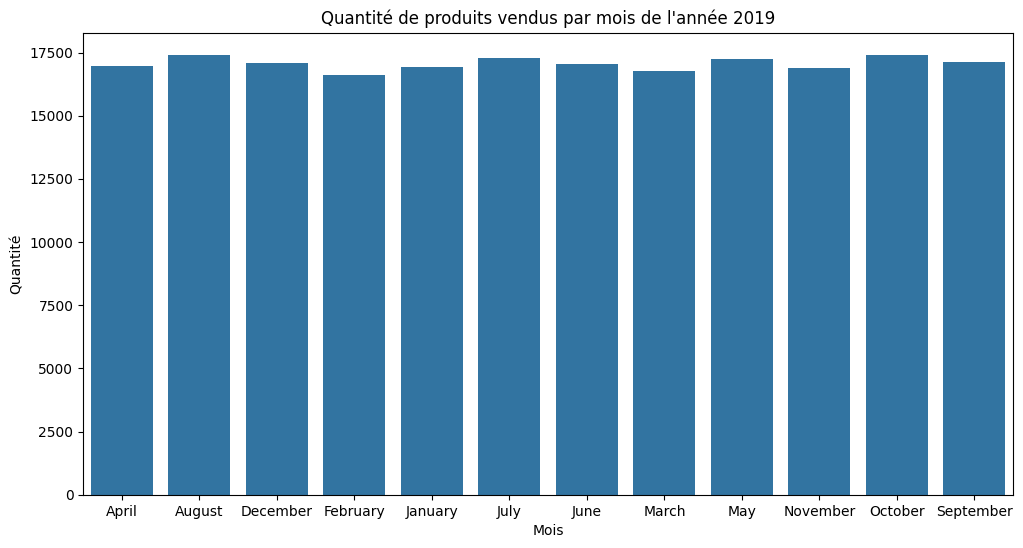

In [ ]:
# Quantité de produits vendus par mois
quantity_by_month = csvdf.groupBy("Month").sum("Predicted_Quantity").orderBy("Month")
quantity_by_month_pd = quantity_by_month.toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=quantity_by_month_pd, x='Month', y='sum(Predicted_Quantity)')
plt.title("Quantité de produits vendus par mois de l'année 2019")
plt.xlabel('Mois')
plt.ylabel('Quantité')
plt.show()


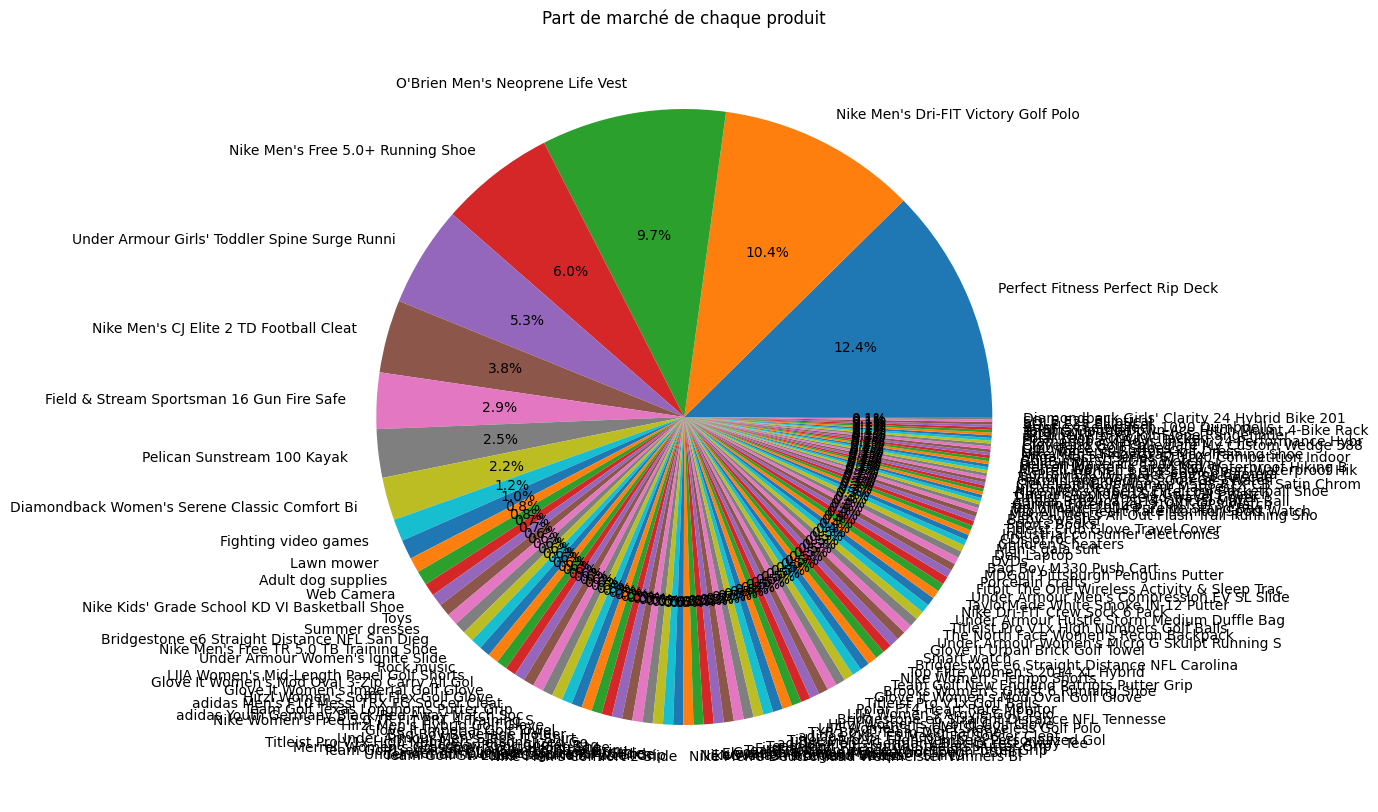

In [ ]:
#Performance des Produits
product_sales = csvdf.groupBy("Product_Name").sum("Predicted_Quantity").orderBy("sum(Predicted_Quantity)", ascending=False)
product_sales_pd = product_sales.toPandas()

plt.figure(figsize=(10, 10))
plt.pie(product_sales_pd['sum(Predicted_Quantity)'], labels=product_sales_pd['Product_Name'], autopct='%1.1f%%')
plt.title('Part de marché de chaque produit')
plt.show()